In [ ]:
# STEP 1: Install packages
!pip install matplotlib pillow numpy

# STEP 2: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files


In [ ]:
# STEP 3: Upload image
uploaded = files.upload()
filename = list(uploaded.keys())[0]
image = Image.open(filename).convert('RGB')

# STEP 4: Convert image to numpy array
img_np = np.array(image)
height, width = img_np.shape[:2]

Saving testphoto, Kromona with clouds.JPG to testphoto, Kromona with clouds (1).JPG


In [ ]:
# STEP 5: Define classification logic with off-white included
def classify_pixel(pixel):
    r, g, b = pixel
    # Cloud/White/Off-white: light with low color variation
    if min(r, g, b) > 130 and max(abs(r - g), abs(g - b), abs(r - b)) < 70:
        return 'Cloud/White'
    elif g > 100 and r < 100 and b < 100:
        return 'Green'
    elif b > 120 and g < 100 and r < 100:
        return 'Blue'
    elif b > 150 and g > 150 and r < 130:
        return 'Light Blue'
    else:
        return 'Other'





/tmp/ipython-input-20-1764232329.py:5: RuntimeWarning: overflow encountered in scalar subtract
  if min(r, g, b) > 130 and max(abs(r - g), abs(g - b), abs(r - b)) < 70:


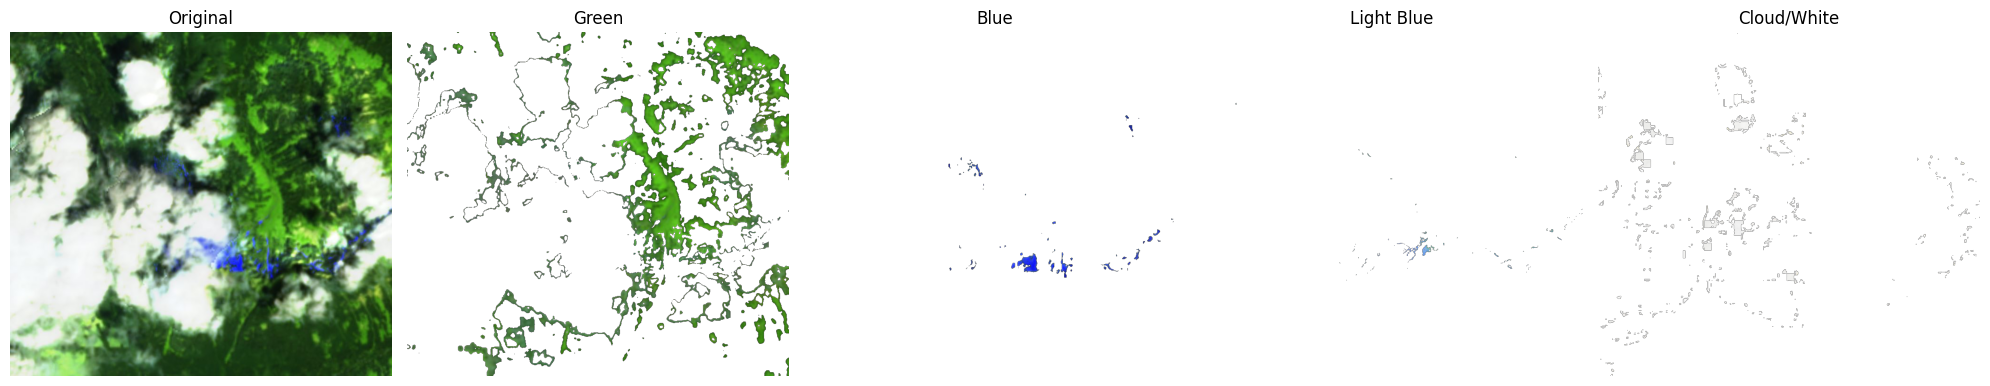

In [ ]:
# STEP 6: Create transparent layers
category_map = {
    'Green': np.zeros((height, width, 4), dtype=np.uint8),
    'Blue': np.zeros((height, width, 4), dtype=np.uint8),
    'Light Blue': np.zeros((height, width, 4), dtype=np.uint8),
    'Cloud/White': np.zeros((height, width, 4), dtype=np.uint8)
}

# STEP 7: Populate layers
for i in range(height):
    for j in range(width):
        pixel = img_np[i, j]
        category = classify_pixel(pixel)
        if category in category_map:
            category_map[category][i, j, :3] = pixel
            category_map[category][i, j, 3] = 255  # fully opaque

# STEP 8: Display original + filtered layers in a row
titles = ['Original', 'Green', 'Blue', 'Light Blue', 'Cloud/White']
images = [image] + [Image.fromarray(rgba, 'RGBA') for rgba in category_map.values()]

plt.figure(figsize=(20, 5))
for idx, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#This function takes an image and categorizes the pixels.
import numpy as np
import matplotlib.pyplot as plt

def classify_pixel(pixel):
    r, g, b = pixel
    # Cloud/White/Off-white (broad)
    if min(r, g, b) > 130 and max(abs(r - g), abs(g - b), abs(r - b)) < 70:
        return 'Cloud/White'
    elif g > 100 and r < 100 and b < 100:
        return 'Green'
    elif b > 120 and g < 100 and r < 100:
        return 'Blue'
    elif b > 150 and g > 150 and r < 130:
        return 'Light Blue'
    else:
        return 'Other'

def analyze_image_colors(image):
    img_np = np.array(image.convert('RGB'))
    flat_pixels = img_np.reshape(-1, 3)

    # Classify each pixel
    labels = np.array([classify_pixel(p) for p in flat_pixels])
    total_pixels = len(flat_pixels)

    # Count categories
    unique, counts = np.unique(labels, return_counts=True)
    color_counts = dict(zip(unique, counts))

    # Categories to show
    labels_to_show = ['Green', 'Blue', 'Light Blue', 'Cloud/White']
    sizes = [color_counts.get(label, 0) for label in labels_to_show]

    # Format labels
    formatted_labels = [
        f"{label}: {count:,} ({count / total_pixels:.1%})"
        for label, count in zip(labels_to_show, sizes) if count > 0
    ]
    filtered_sizes = [s for s in sizes if s > 0]

    # Output
    print(f"Total Pixels: {total_pixels:,}")

    # Pie chart
    plt.figure(figsize=(7, 7))
    plt.pie(filtered_sizes, labels=formatted_labels, colors=['green', 'blue', 'cyan', 'lightgray'])
    plt.title("Pixel Counts and Ratios by Category")
    plt.show()


/tmp/ipython-input-5-2236868922.py:8: RuntimeWarning: overflow encountered in scalar subtract
  if min(r, g, b) > 130 and max(abs(r - g), abs(g - b), abs(r - b)) < 70:


Total Pixels: 589,761


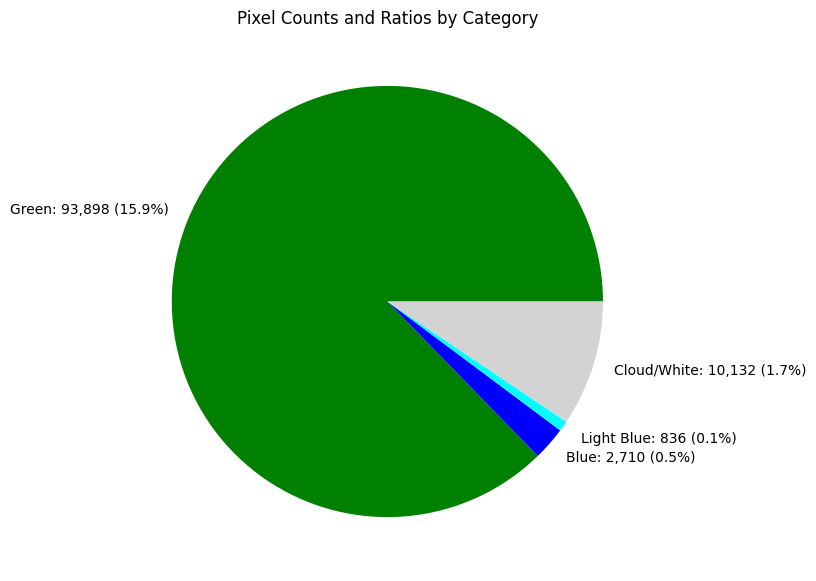

In [ ]:
from PIL import Image

image = Image.open("/content/testphoto, Kromona with clouds.JPG")
analyze_image_colors(image)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from PIL import Image

# Classification function (broad cloud/white + others)
def classify_pixel(pixel):
    r, g, b = pixel
    if min(r, g, b) > 130 and max(abs(r - g), abs(g - b), abs(r - b)) < 70:
        return 'Cloud/White'
    elif g > 100 and r < 100 and b < 100:
        return 'Green'
    elif b > 120 and g < 100 and r < 100:
        return 'Blue'
    elif b > 150 and g > 150 and r < 130:
        return 'Light Blue'
    else:
        return 'Other'

# Main analysis + visualization function
def analyze_image_colors(image):
    img_np = np.array(image.convert('RGB'))
    flat_pixels = img_np.reshape(-1, 3)

    # Classify pixels
    labels = np.array([classify_pixel(p) for p in flat_pixels])
    total_pixels = len(flat_pixels)

    # Count category appearances
    unique, counts = np.unique(labels, return_counts=True)
    color_counts = dict(zip(unique, counts))

    # Define display categories + colors
    categories = ['Green', 'Blue', 'Light Blue', 'Cloud/White', 'Other']
    colors = ['green', 'blue', 'cyan', 'lightgray', 'gray']
    sizes = [color_counts.get(cat, 0) for cat in categories]
    percentages = [count / total_pixels * 100 for count in sizes]

    # Clean: only show non-zero categories
    display_data = [
        (cat, count, pct, col)
        for cat, count, pct, col in zip(categories, sizes, percentages, colors)
        if count > 0
    ]

    # Unpack cleaned data
    display_labels, display_counts, display_pcts, display_colors = zip(*display_data)

    # 🎯 BEGIN VISUALIZATION
    fig = plt.figure(constrained_layout=True, figsize=(14, 6))
    gs = fig.add_gridspec(2, 3)

    # PIE CHART
    ax1 = fig.add_subplot(gs[:, 0])
    # PIE CHART with improved spacing for vars
    pie_labels = [
        f"{lbl}\n{cnt:,}\n({pct:.1f}%)"
        for lbl, cnt, pct in zip(display_labels, display_counts, display_pcts)
    ]
    wedges, _ = ax1.pie(display_counts, colors=display_colors, startangle=90)
    ax1.legend(wedges, pie_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))



    # BAR CHART
    ax2 = fig.add_subplot(gs[0, 1:])
    bars = ax2.bar(display_labels, display_counts, color=display_colors)
    ax2.set_title("Pixel Count by Category", fontsize=14)
    ax2.set_ylabel("Pixels")
    ax2.tick_params(axis='x', labelrotation=15)
    ax2.bar_label(bars, labels=[f"{c:,}" for c in display_counts], fontsize=10, padding=3)

    # TABLE
    ax3 = fig.add_subplot(gs[1, 1:])
    ax3.axis('off')
    cell_text = [
        [lbl, f"{cnt:,}", f"{pct:.1f}%", ''] for lbl, cnt, pct in zip(display_labels, display_counts, display_pcts)
    ]
    table = ax3.table(cellText=cell_text,
                      colLabels=["Category", "Count", "Percent", ""],
                      cellLoc='center',
                      loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Add color swatches
    for i, color in enumerate(display_colors):
        table[i + 1, 3].set_facecolor(color)

    fig.suptitle(f"Total Pixels: {total_pixels:,}", fontsize=16, fontweight='bold')
    plt.show()


/tmp/ipython-input-12-1676091944.py:9: RuntimeWarning: overflow encountered in scalar subtract
  if min(r, g, b) > 130 and max(abs(r - g), abs(g - b), abs(r - b)) < 70:


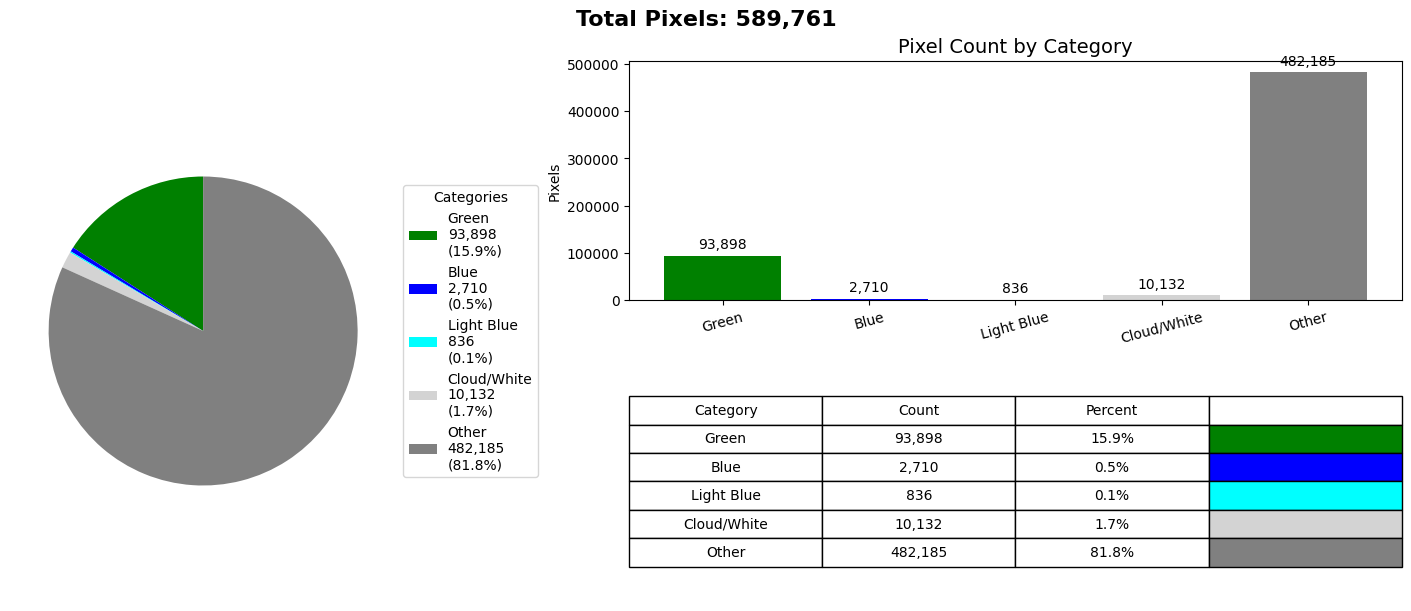

In [ ]:
analyze_image_colors(image)
# For the model this progam need to focus on Blue, Clouds, Light Blue, in that order. It just needs to be able to detect the presence of clouds.